In [ ]:
!pip install geopandas==0.8.1 matplotlib==3.2.2 networkx==2.3  numpy==1.18.5  pandas==1.0.5  seaborn==0.10.1

In [ ]:
!pip install geoplot

     |████████████████████████████████| 10.8 MB 6.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 36.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 14.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 53.7 MB/s 
     |████████████████████████████████| 19.3 MB 443 kB/s 
     |████████████████████████████████| 219 kB 55.8 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516273 sha256=c5583b3a1d593ccd64eb1d689b3ed5e350d4cccd6cb35629e523730930996dfd
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl s

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import datetime 
import seaborn as sns
import operator
import numpy as np
# import geopandas as gp
%load_ext autoreload
%autoreload 2
import networkx as nx
import community
import random
from shapely.geometry import Point

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import sys
customized_path_to_homework = "/content/drive/Shareddrives/Urban Computing/"
sys.path.append(customized_path_to_homework)

import os
import pandas as pd
import numpy as np

In [ ]:
path_to_data = "/content/drive/Shareddrives/Urban Computing/Data"

In [ ]:
def get_data(city, data):
  df = pd.read_csv("/content/drive/Shareddrives/Urban Computing/Data/NYC/merged_1_mo.csv")
  return df

In [ ]:
df = get_data("NYC", None)

In [ ]:
df.head()

In [ ]:
    import datetime
    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import OneHotEncoder
    dt = pd.DataFrame(df) 
    dt.columns =['tripduration', 'starttime', 'stoptime', 'start station id', 'start station name', 'start station latitude', 'start station longitude', 'end station id', 'end station name', 'end station latitude', 'end station longitude', 'bikeid', 'usertype', 'birth year', 'gender']

    dt['tripduration'] = dt['tripduration'].astype('int64')
    dt['starttime'] = dt['starttime'].astype('datetime64[ns]')
    dt['stoptime'] = dt['stoptime'].astype('datetime64[ns]')
    dt['start station id'] = dt['start station id'].astype('int64')
    dt['start station name'] = dt['start station name'].astype(str)
    dt['start station latitude'] = dt['start station latitude'].astype('int64')
    dt['start station longitude'] = dt['start station longitude'].astype('int64')
    dt['end station id'] = dt['end station id'].astype('int64')
    dt['end station name'] = dt['end station name'].astype(str)
    dt['end station latitude'] = dt['end station latitude'].astype('int64')
    dt['end station longitude'] = dt['end station longitude'].astype('int64')
    dt['bikeid'] = dt['bikeid'].astype('int64')
    dt['usertype'] = dt['usertype'].astype(str)
    dt['birth year'] = dt['birth year'].astype(str)
    dt['gender'] = dt['gender'].astype('int64')



In [ ]:
    days = dt['starttime'] 
    daysList = []
    for index, row in days.iteritems():
      temp = pd.Timestamp(row)
      daysList.append(temp.day_name())
    dt['day of week'] = daysList
    dt.head()

tripduration               starttime  ... gender  day of week
0           602 2019-12-01 00:00:05.564  ...      1       Sunday
1          1206 2019-12-01 00:00:10.963  ...      1       Sunday
2           723 2019-12-01 00:00:11.818  ...      1       Sunday
3           404 2019-12-01 00:00:12.220  ...      1       Sunday
4          1059 2019-12-01 00:00:14.723  ...      1       Sunday

[5 rows x 16 columns]

In [ ]:
dt.head()

tripduration               starttime  ... gender  day of week
0           602 2019-12-01 00:00:05.564  ...      1       Sunday
1          1206 2019-12-01 00:00:10.963  ...      1       Sunday
2           723 2019-12-01 00:00:11.818  ...      1       Sunday
3           404 2019-12-01 00:00:12.220  ...      1       Sunday
4          1059 2019-12-01 00:00:14.723  ...      1       Sunday

[5 rows x 16 columns]

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import os, sys


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


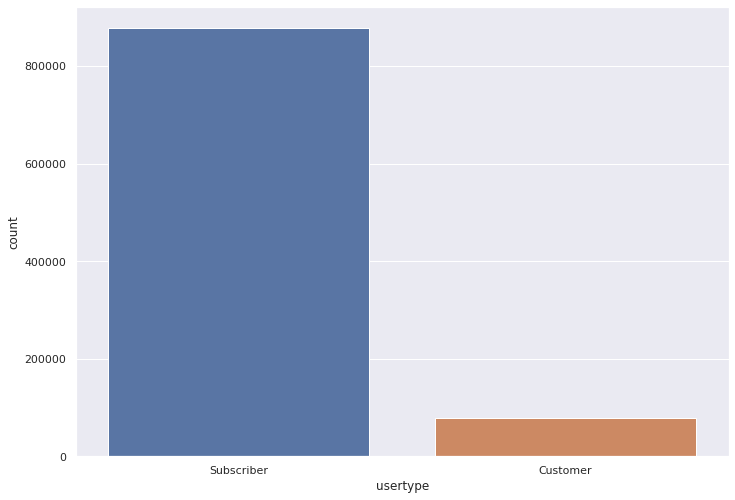

In [ ]:
sns.countplot(dt['usertype'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


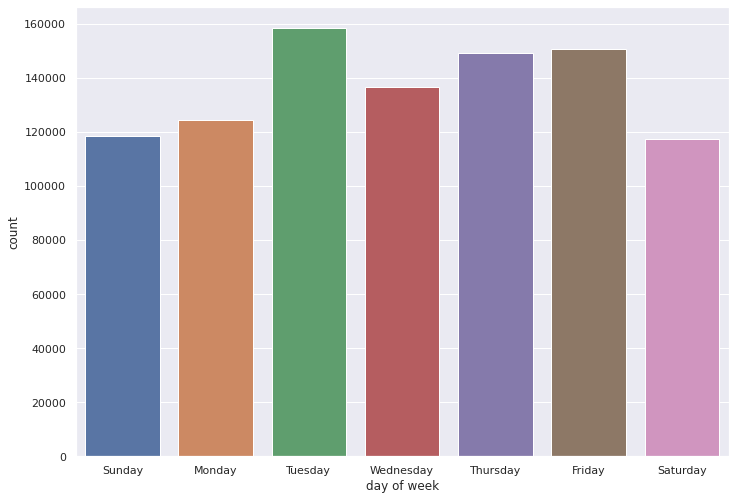

In [ ]:
sns.countplot(dt['day of week'])

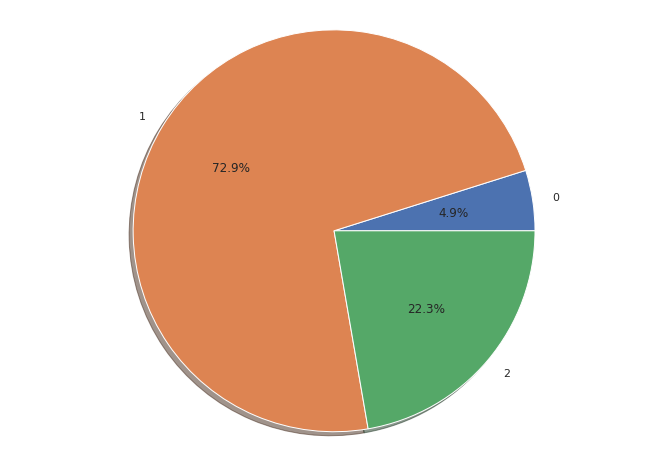

In [ ]:
#Gender Percentage NYC
labels = df['gender'].astype('category').cat.categories.tolist()
counts = df['gender'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

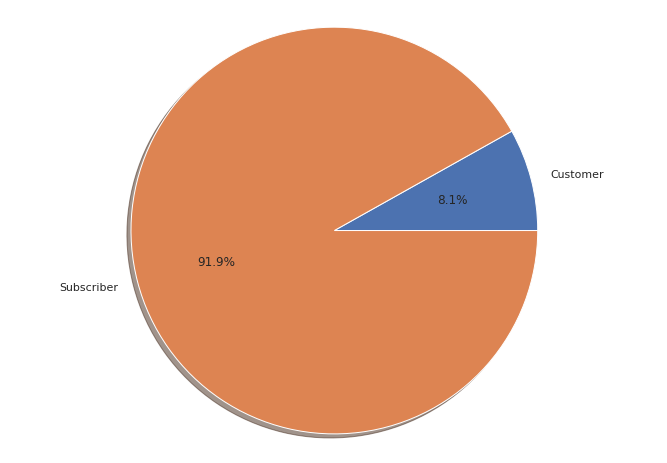

In [ ]:
#usertype Percentage
labels = df['usertype'].astype('category').cat.categories.tolist()
counts = df['usertype'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [ ]:
print('Shape of the dataframe:', df.shape,'\n')
print('Printing one record:', df[:1].T)

Shape of the dataframe: (473620, 16) 

Printing one record:                                                                          0
tripduration                                                          1142
starttime                                              2014-08-01 00:00:00
stoptime                                               2014-08-01 00:19:00
start station id                                                       470
start station name                                         W 20 St & 8 Ave
start station latitude                                                  40
start station longitude                                                -74
end station id                                                         312
end station name                                   Allen St & E Houston St
end station latitude                                                    40
end station longitude                                                  -73
bikeid                                  

In [ ]:
def create_graph(data, start, end):
  edges = list(zip(data[start].tolist(), data[end].tolist()))
  G = nx.DiGraph()
  G.add_edges_from(edges)
  return G

In [ ]:
g = create_graph(df, "start station id", "end station id")

In [ ]:
def plot_network(g,node_dist, nodecolor='g',nodesize=1200,nodealpha=0.6,edgecolor='k',\
                 edgealpha=0.2,figsize=(9,6),title=None,titlefontsize=20,savefig=False,\
                 filename=None,bipartite=False,bipartite_colors=None,nodelabels=None,
                 edgelabels=None):
    #pos=nx.spring_layout(g,iterations=200)
    pos=nx.spring_layout(g,k=node_dist,iterations=300)
    nodes=g.nodes()
    edges=g.edges()
    plt.figure(figsize=figsize)
    
    nx.draw_networkx_edges(g,pos=pos,edge_color=edgecolor,alpha=edgealpha)
    print(1)
    #nx.draw_networkx_edges(g,pos=pos,edge_color=edgecolor,alpha=edgealpha)
    if bipartite and bipartite_colors!=None:
        bipartite_sets=nx.bipartite.sets(g)
        _nodecolor=[]
        for _set in bipartite_sets:
            _clr=bipartite_colors.pop()
            for node in _set:
                _nodecolor.append(_clr)

        nx.draw_networkx_nodes(g,pos=pos,node_color=_nodecolor,alpha=nodealpha,node_size=nodesize)
    else:
        nx.draw_networkx_nodes(g,pos=pos,node_color=nodecolor,alpha=nodealpha,node_size=nodesize)

    labels={}
    for idx,node in enumerate(g.nodes()):
        labels[node]=str(node)

    if nodelabels!=None:
        nx.draw_networkx_labels(g,pos,labels,font_size=16)
    if edgelabels!=None: #Assumed that it is a dict with edge tuple as the key and label as value.
        nx.draw_networkx_edge_labels(g,pos,edgelabels,font_size=12)
    plt.xticks([])
    plt.yticks([])
    if title!=None:
        plt.title(title,fontsize=titlefontsize)
    if savefig and filename!=None:
        plt.savefig(filename,dpi=300)

In [ ]:
# plot_network(g, node_dist=1, edgealpha=0.08, nodesize=20,savefig=False,figsize=(15,15))
import geopandas
import geoplot
import pandas as pd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# store_locDF=pd.read_csv('stores.csv')
# cols_to_keep=['store_longitude','store_latitude']

crs={'init':'epsg:4326'}

boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_parking_tickets'))

geo_df=geopandas.GeoDataFrame(df,crs=crs,geometry=geopandas.points_from_xy(df["start station longitude"], df["start station latitude"]))



fig,ax=plt.subplots(figsize=(15,15))
boroughs.plot(ax=ax,alpha=0.4,color="grey")
geo_df.plot(ax=ax,markersize=10, alpha=0.4,color="green")#, label="Active Store")
# geo_df[geo_df['active_yn']=="N"].plot(ax=ax,markersize=200, alpha=0.4,color="red", label="Inactive Stores")
plt.legend()